<a href="https://colab.research.google.com/github/andrewkim435/NBA-Salary-Prediction/blob/main/NBA_Player_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import statsmodels.api as sm

In [92]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**PROJECT DESCRIPTION: We will use NBA pergame statistics from the 2018-19, 2019-20, and 2020-21 seaons to predict salary data for the 2021-22 season. This will allow us to see which players are overvalued or undervalued. We will use a variety of different predictive model strategies and compare results.**

Data is from https://www.basketball-reference.com/ </br>
Inflation rates are from https://www.in2013dollars.com/

Find and enter the path of the following 4 pergame stats and 4 salary data csv files.

**LOADING DATASETS**

In [93]:
pergame_2018_19 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/pergame_stats_2018-2019.csv")
pergame_2018_19

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,abrinal01
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7,acyqu01
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,adamsja01
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,adamsst01
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5,zellety01
704,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8,zizican01
705,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9,zubaciv01
706,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5,zubaciv01


In [94]:
pergame_2019_20 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/pergame_stats_2019-2020.csv")
pergame_2019_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,adamsst01
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,aldrila01
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,alexaky01
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,youngtr01
647,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,zelleco01
648,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,zellety01
649,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,zizican01


In [95]:
pergame_2020_21 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/pergame_stats_2020-2021.csv")
pergame_2020_21

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,adamsst01
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,adebaba01
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,wrighde01
701,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,youngth01
702,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,youngtr01
703,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,zelleco01


In [96]:
pergame_2021_22 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/pergame_stats_2021-2022.csv")
pergame_2021_22

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,youngth01
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01


In [97]:
salaries_2018_19 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/salaries_2018-2019.csv")
salaries_2018_19

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$37457154,$40231758,$43006362,$45780966,NaN,NaN,Bird Rights,$166476240
2,2,Chris Paul\paulch01,HOU,$35654150,$38506482,$41358814,$44211146,NaN,NaN,NaN,$159730592
3,3,Russell Westbrook\westbru01,OKC,$35654150,$38178000,$41006000,$43848000,$46662000,NaN,Bird Rights,$158686150
4,4,LeBron James\jamesle01,LAL,$35654150,$37436858,$39219565,$41002273,NaN,NaN,NaN,$113310573
...,...,...,...,...,...,...,...,...,...,...,...
480,480,Troy Williams\willitr02,HOU,$122741,$122741,$122741,$122741,$122741,NaN,NaN,$613705
481,481,Demetrius Jackson\jacksde01,BOS,$92857,$92857,$92857,$92857,$92857,NaN,NaN,$557142
482,482,Shaquille Harrison\harrish01,PHO,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
483,483,Garlon Green\greenga02,NOP,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000


In [98]:
salaries_2019_20 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/salaries_2019-2020.csv")
salaries_2019_20

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$37457154,$40231758,$43006362,$45780966,NaN,NaN,Bird Rights,$166476240
2,2,LeBron James\jamesle01,LAL,$35654150,$37436858,$39219565,$41002273,NaN,NaN,NaN,$112310573
3,3,Russell Westbrook\westbru01,OKC,$35654150,$38178000,$41006000,$43848000,$46662000,NaN,Bird Rights,$35654150
4,4,Chris Paul\paulch01,HOU,$35654150,$38506482,$41358814,$44211146,NaN,NaN,NaN,$35654150
...,...,...,...,...,...,...,...,...,...,...,...
584,584,Tarik Phillip\phillta01,WAS,$9474,$1443842,NaN,NaN,NaN,NaN,NaN,$9474
585,585,Terry Larrier\larrite01,DAL,$6000,NaN,NaN,NaN,NaN,NaN,NaN,$6000
586,586,Theo Pinson\pinsoth01,BRK,$4737,NaN,NaN,NaN,NaN,NaN,Two-Way Contract,$1450434
587,587,Kendrick Nunn\nunnke01,MIA,$4737,$1416852,$1663861,NaN,NaN,NaN,NaN,$4737


In [99]:
salaries_2020_21 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/salaries_2020-2021.csv")
salaries_2020_21

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$40231758,$43006362,$45780966,NaN,NaN,NaN,Bird Rights,$129019086
2,2,Chris Paul\paulch01,OKC,$38506482,$41358814,$44211146,NaN,NaN,NaN,Bird Rights,$79865296
3,3,Russell Westbrook\westbru01,HOU,$38178000,$41006000,$43848000,$46662000,NaN,NaN,Bird Rights,$123032000
4,4,John Wall\walljo01,WAS,$37800000,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000
...,...,...,...,...,...,...,...,...,...,...,...
564,564,William Howard\howarwi01,UTA,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
565,565,Isaiah Taylor\taylois01,TOR,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
566,566,Tyler Lydon\lydonty01,SAC,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
567,567,Hollis Thompson\thompho01,SAC,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000


In [100]:
salaries_2021_22 = pd.read_csv("/content/drive/MyDrive/NBA Salary Data/salaries_2021-2022.csv")
salaries_2021_22

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2021-22,2022-23,2023-24,2024-25,2025-26,2026-27,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$45780966,$48070014,$51915615,$55761216,$59606817,NaN,Bird Rights,$261134628
2,2,John Wall\walljo01,HOU,$44310840,$47366760,NaN,NaN,NaN,NaN,Bird Rights,$44310840
3,3,Russell Westbrook\westbru01,LAL,$44211146,$47063478,NaN,NaN,NaN,NaN,Bird Rights,$44211146
4,4,James Harden\hardeja01,PHI,$43848000,$46872000,NaN,NaN,NaN,NaN,Bird Rights,$43848000
...,...,...,...,...,...,...,...,...,...,...,...
532,532,Emanuel Terry\terryem01,PHO,$85578,NaN,NaN,NaN,NaN,NaN,Minimum Salary,$85578
533,533,Tyrell Terry\terryty01,MEM,$1517981,$1782621,NaN,NaN,NaN,NaN,NaN,$85578
534,534,Admiral Schofield\schofad01,ORL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$169706
535,535,Malcolm Hill\hillma01,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$53176


**CLEANING DATA**

**Pergame data**
1. Drop rows with missing values
2. Drop unnecessary columns (Rk and Player-additional)
3. Team = 'TOT' means a player played for multiple teams that season, we will keep these rows and drop the rows containing stats of partial seasons with different teams for these players

In [101]:
pergame_2018_19 = pergame_2018_19.dropna(axis = 0).drop(['Rk', 'Player-additional'], axis = 1)
pergame_2018_19 = pergame_2018_19.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2018_19

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,23,ORL,78,78,33.8,6.0,13.4,0.449,...,0.731,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0
1,Aaron Holiday,PG,22,IND,50,0,12.9,2.1,5.2,0.401,...,0.820,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9
2,Abdel Nader,SF,25,OKC,61,1,11.4,1.5,3.5,0.423,...,0.750,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0
3,Al Horford,C,32,BOS,68,68,29.0,5.7,10.6,0.535,...,0.821,1.8,5.0,6.7,4.2,0.9,1.3,1.5,1.9,13.6
4,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,0.433,...,0.867,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Zach Collins,C,21,POR,77,0,17.6,2.5,5.2,0.473,...,0.746,1.4,2.8,4.2,0.9,0.3,0.9,1.0,2.3,6.6
471,Zach LaVine,SG,23,CHI,63,62,34.5,8.4,18.0,0.467,...,0.832,0.6,4.0,4.7,4.5,1.0,0.4,3.4,2.2,23.7
472,Zaza Pachulia,C,34,DET,68,3,12.9,1.3,2.8,0.440,...,0.782,1.5,2.4,3.9,1.3,0.5,0.3,0.8,2.2,3.9
473,Zhaire Smith,SG,19,PHI,6,2,18.5,2.3,5.7,0.412,...,0.750,0.5,1.7,2.2,1.7,0.3,0.3,1.0,1.3,6.7


In [102]:
pergame_2019_20 = pergame_2019_20.drop(['Rk', 'Player-additional'], axis = 1).dropna(axis = 0)
pergame_2019_20 = pergame_2019_20.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2019_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,...,0.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4
1,Aaron Holiday,PG,23,IND,66,33,24.5,3.5,8.5,0.414,...,0.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5
2,Abdel Nader,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,...,0.773,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3
3,Adam Mokoka,SF,21,CHI,11,0,10.2,1.1,2.5,0.429,...,0.500,0.6,0.3,0.9,0.4,0.4,0.0,0.2,1.5,2.9
4,Admiral Schofield,PF,22,WAS,33,2,11.2,1.1,2.8,0.380,...,0.667,0.2,1.2,1.4,0.5,0.2,0.1,0.2,1.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Zach Collins,PF,22,POR,11,11,26.4,2.9,6.2,0.471,...,0.750,2.3,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0
480,Zach LaVine,SF,24,CHI,60,60,34.8,9.0,20.0,0.450,...,0.802,0.7,4.1,4.8,4.2,1.5,0.5,3.4,2.2,25.5
481,Zach Norvell,SG,22,TOT,5,0,8.2,0.6,2.4,0.250,...,1.000,0.0,1.2,1.2,0.6,0.4,0.0,0.6,0.8,2.0
482,Zhaire Smith,SF,20,PHI,7,0,4.6,0.4,1.6,0.273,...,0.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1


In [103]:
pergame_2020_21 = pergame_2020_21.drop(['Rk', 'Player-additional'], axis = 1).dropna(axis = 0)
pergame_2020_21 = pergame_2020_21.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2020_21

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,25,TOT,50,50,27.7,4.6,10.0,0.463,...,0.651,1.5,4.1,5.7,3.2,0.7,0.7,1.9,1.8,12.4
1,Aaron Holiday,PG,24,IND,66,8,17.8,2.6,6.6,0.390,...,0.819,0.2,1.1,1.3,1.9,0.7,0.2,1.0,1.4,7.2
2,Aaron Nesmith,SF,21,BOS,46,1,14.5,1.7,3.9,0.438,...,0.786,0.6,2.2,2.8,0.5,0.3,0.2,0.5,1.9,4.7
3,Abdel Nader,SF,27,PHO,24,0,14.8,2.4,4.8,0.491,...,0.757,0.3,2.3,2.6,0.8,0.4,0.4,0.8,1.4,6.7
4,Adam Mokoka,SG,22,CHI,14,0,4.0,0.5,1.4,0.368,...,0.000,0.1,0.3,0.4,0.4,0.1,0.1,0.4,0.4,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Yogi Ferrell,PG,27,TOT,10,0,13.6,2.0,5.7,0.351,...,0.778,0.5,1.4,1.9,2.2,0.7,0.3,0.3,1.1,5.6
499,Yuta Watanabe,SF,26,TOR,50,4,14.5,1.6,3.6,0.439,...,0.828,0.7,2.5,3.2,0.8,0.5,0.4,0.4,1.1,4.4
500,Zach LaVine,SG,25,CHI,58,58,35.1,9.8,19.4,0.507,...,0.849,0.6,4.4,5.0,4.9,0.8,0.5,3.5,2.4,27.4
501,Zeke Nnaji,PF,20,DEN,42,1,9.5,1.2,2.5,0.481,...,0.800,0.3,1.2,1.5,0.2,0.2,0.1,0.2,0.7,3.2


In [104]:
pergame_2021_22 = pergame_2021_22.drop(['Rk', 'Player-additional'], axis = 1).dropna(axis = 0)
pergame_2021_22 = pergame_2021_22.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2021_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,0.520,...,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1,Aaron Holiday,PG,25,TOT,63,15,16.2,2.4,5.4,0.447,...,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
2,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,0.396,...,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8
3,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,0.463,...,0.729,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3
4,Abdel Nader,SF,28,PHO,14,0,10.4,0.9,2.5,0.343,...,0.600,0.3,1.6,1.9,0.5,0.6,0.3,0.8,1.4,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Zach Collins,C,24,SAS,28,4,17.9,2.7,5.5,0.490,...,0.800,1.6,3.8,5.5,2.2,0.5,0.8,1.6,2.4,7.8
516,Zach LaVine,SG,26,CHI,67,67,34.7,8.4,17.7,0.476,...,0.853,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4
517,Zavier Simpson,PG,24,OKC,4,4,43.5,4.8,13.0,0.365,...,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0
518,Zeke Nnaji,PF,21,DEN,41,1,17.0,2.3,4.5,0.516,...,0.631,1.4,2.2,3.6,0.4,0.4,0.3,0.6,1.9,6.6


**Salary data**
1. Drop rows with missing values
2. Only columns we need are the name and the salary of the most recent year, drop other columns
3. Rename columns appropriately
4. Drop first row
5. Clean player names
6. Clean salary values
7. Adjust salary values for inflation
8. Some players may have switched teams and have duplicate contracts so we will only keep 1.
9. Let's try to use smaller numbers, so we'll scale salary values down in terms of millions


In [105]:
inflation_18_to_21 = .0786
inflation_19_to_21 = .0599
inflation_20_to_21 = .0470

In [106]:
salaries_2018_19.head(2)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$37457154,$40231758,$43006362,$45780966,NaN,NaN,Bird Rights,$166476240


In [107]:
salaries_2021_22.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2021-22,2022-23,2023-24,2024-25,2025-26,2026-27,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$45780966,$48070014,$51915615,$55761216,$59606817,NaN,Bird Rights,$261134628


In [108]:
salaries_2018_19 = salaries_2018_19[['Unnamed: 1', 'Salary']].dropna(axis = 0).drop(index=salaries_2018_19.index[0], axis=0).rename(columns={"Unnamed: 1": "Player"})
salaries_2018_19['Player'] = salaries_2018_19['Player'].str.extract(r'(.+\s.+)\\.+')
salaries_2018_19['Salary'] = salaries_2018_19['Salary'].str.extract(r'\$([0-9]+)').astype(int) * (1+ inflation_18_to_21) / 1000000
salaries_2018_19 = salaries_2018_19.sort_values(by='Salary', ascending=False).groupby('Player').first().reset_index()
salaries_2018_19

,Player,Salary
0,A.J. Hammons,0.377605
1,Aaron Gordon,23.287954
2,Aaron Holiday,2.062240
3,Abdel Nader,1.486572
4,Al Horford,31.202507
...,...,...
472,Zach LaVine,21.032700
473,Zach Randolph,12.611323
474,Zaza Pachulia,2.582047
475,Zhaire Smith,2.817087


In [109]:
salaries_2019_20 = salaries_2019_20[['Unnamed: 1', 'Salary.1']].dropna(axis = 0).drop(index=salaries_2019_20.index[0], axis=0).rename(columns={"Unnamed: 1": "Player", "Salary.1" : 'Salary'})
salaries_2019_20['Player'] = salaries_2019_20['Player'].str.extract(r'(.+\s.+)\\.+')
salaries_2019_20['Salary'] = salaries_2019_20['Salary'].str.extract(r'\$([0-9]+)').astype(int) * (1+ inflation_19_to_21) / 1000000
salaries_2019_20 = salaries_2019_20.sort_values(by='Salary', ascending=False).groupby('Player').first().reset_index()
salaries_2019_20

,Player,Salary
0,A.J. Hammons,0.371057
1,Aaron Gordon,21.053468
2,Aaron Holiday,2.373328
3,Abdel Nader,1.715469
4,Alex Len,4.409184
...,...,...
285,Zach Collins,4.494188
286,Zach LaVine,20.668050
287,Zhaire Smith,3.242022
288,Élie Okobo,1.501721


In [110]:
salaries_2020_21 = salaries_2020_21[['Unnamed: 1', 'Salary.1']].dropna(axis = 0).drop(index=salaries_2020_21.index[0], axis=0).rename(columns={"Unnamed: 1": "Player", "Salary.1" : 'Salary'})
salaries_2020_21['Player'] = salaries_2020_21['Player'].str.extract(r'(.+\s.+)\\.+')
salaries_2020_21['Salary'] = salaries_2020_21['Salary'].str.extract(r'\$([0-9]+)').astype(int) * (1+ inflation_20_to_21) / 1000000
salaries_2020_21 = salaries_2020_21.sort_values(by='Salary', ascending=False).groupby('Player').first().reset_index()
salaries_2020_21

,Player,Salary
0,A.J. Hammons,0.366541
1,Aaron Gordon,18.988773
2,Aaron Holiday,2.455885
3,Abdel Nader,1.835339
4,Admiral Schofield,1.589326
...,...,...
343,Willie Cauley-Stein,2.393816
344,Zach Collins,5.660349
345,Zach LaVine,20.416500
346,Zhaire Smith,3.355216


In [111]:
salaries_2021_22 = salaries_2021_22[['Unnamed: 1', 'Salary']].dropna(axis = 0).drop(index=salaries_2021_22.index[0], axis=0).rename(columns={"Unnamed: 1": "Player"})
salaries_2021_22['Player'] = salaries_2021_22['Player'].str.extract(r'(.+\s.+)\\.+')
salaries_2021_22['Salary'] = salaries_2021_22['Salary'].str.extract(r'\$([0-9]+)').astype(int) / 1000000
salaries_2021_22 = salaries_2021_22.sort_values(by='Salary', ascending=False).groupby('Player').first().reset_index()
salaries_2021_22

,Player,Salary
0,Aaron Gordon,16.409091
1,Aaron Holiday,3.980551
2,Aaron Nesmith,3.631200
3,Aaron Wiggins,1.000000
4,Abdel Nader,2.000000
...,...,...
469,Zach Collins,6.984127
470,Zach LaVine,19.500000
471,Zeke Nnaji,2.498760
472,Ziaire Williams,4.373160


**Merging data sets** </br>
Luckily, from 2018-2022, no players with identical first and last names played in the NBA at the same time. We can merge pergame data now with salary data. Note that some players had missing data, so we will only include players with both pergame statistics and salary data.

In [112]:
data_2018_19 = pergame_2018_19.merge(salaries_2018_19, on = 'Player')
data_2018_19

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,23,ORL,78,78,33.8,6.0,13.4,0.449,...,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0,23.287954
1,Aaron Holiday,PG,22,IND,50,0,12.9,2.1,5.2,0.401,...,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9,2.062240
2,Abdel Nader,SF,25,OKC,61,1,11.4,1.5,3.5,0.423,...,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0,1.486572
3,Al Horford,C,32,BOS,68,68,29.0,5.7,10.6,0.535,...,1.8,5.0,6.7,4.2,0.9,1.3,1.5,1.9,13.6,31.202507
4,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,0.433,...,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4,7.503933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Yogi Ferrell,PG,25,SAC,71,3,15.0,2.2,5.0,0.435,...,0.2,1.4,1.5,1.9,0.5,0.1,0.6,0.9,5.9,3.235800
363,Zach Collins,C,21,POR,77,0,17.6,2.5,5.2,0.473,...,1.4,2.8,4.2,0.9,0.3,0.9,1.0,2.3,6.6,3.914153
364,Zach LaVine,SG,23,CHI,63,62,34.5,8.4,18.0,0.467,...,0.6,4.0,4.7,4.5,1.0,0.4,3.4,2.2,23.7,21.032700
365,Zaza Pachulia,C,34,DET,68,3,12.9,1.3,2.8,0.440,...,1.5,2.4,3.9,1.3,0.5,0.3,0.8,2.2,3.9,2.582047


In [113]:
data_2019_20 = pergame_2019_20.merge(salaries_2019_20, on = 'Player')
data_2019_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,...,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4,21.053468
1,Aaron Holiday,PG,23,IND,66,33,24.5,3.5,8.5,0.414,...,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5,2.373328
2,Abdel Nader,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,...,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3,1.715469
3,Alex Len,C,26,TOT,55,12,17.6,3.2,5.8,0.555,...,1.8,4.0,5.8,0.9,0.4,0.9,1.0,2.3,8.0,4.409184
4,Alfonzo McKinnie,SF,27,CLE,40,1,14.8,1.8,4.3,0.427,...,0.9,1.9,2.8,0.4,0.6,0.2,0.7,1.8,4.6,1.683366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Willy Hernangómez,C,25,CHO,31,0,12.1,2.4,4.5,0.532,...,1.4,2.9,4.3,0.9,0.3,0.2,1.0,1.0,6.1,1.777134
223,Yogi Ferrell,PG,26,SAC,50,0,10.6,1.6,3.8,0.420,...,0.1,0.9,1.0,1.4,0.4,0.1,0.6,0.8,4.4,3.338685
224,Zach Collins,PF,22,POR,11,11,26.4,2.9,6.2,0.471,...,2.3,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0,4.494188
225,Zach LaVine,SF,24,CHI,60,60,34.8,9.0,20.0,0.450,...,0.7,4.1,4.8,4.2,1.5,0.5,3.4,2.2,25.5,20.668050


In [114]:
data_2020_21 = pergame_2020_21.merge(salaries_2020_21, how = 'inner', on = 'Player')
data_2020_21

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,25,TOT,50,50,27.7,4.6,10.0,0.463,...,1.5,4.1,5.7,3.2,0.7,0.7,1.9,1.8,12.4,18.988773
1,Aaron Holiday,PG,24,IND,66,8,17.8,2.6,6.6,0.390,...,0.2,1.1,1.3,1.9,0.7,0.2,1.0,1.4,7.2,2.455885
2,Abdel Nader,SF,27,PHO,24,0,14.8,2.4,4.8,0.491,...,0.3,2.3,2.6,0.8,0.4,0.4,0.8,1.4,6.7,1.835339
3,Al Horford,C,34,OKC,28,28,27.9,5.8,12.9,0.450,...,1.0,5.7,6.7,3.4,0.9,0.9,1.0,1.7,14.2,28.792500
4,Al-Farouq Aminu,PF,30,TOT,23,14,18.9,1.7,4.3,0.384,...,1.0,3.8,4.8,1.3,0.8,0.4,1.2,1.3,4.4,10.177782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Wesley Matthews,SG,34,LAL,58,10,19.5,1.5,4.3,0.353,...,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4,4.8,2.819562
277,Will Barton,SF,30,DEN,56,52,31.0,4.6,10.9,0.426,...,0.7,3.3,4.0,3.2,0.9,0.4,1.7,1.7,12.7,14.574240
278,Willie Cauley-Stein,C,27,DAL,53,16,17.1,2.2,3.4,0.632,...,1.2,3.2,4.5,0.7,0.4,0.8,0.5,2.4,5.3,2.393816
279,Zach LaVine,SG,25,CHI,58,58,35.1,9.8,19.4,0.507,...,0.6,4.4,5.0,4.9,0.8,0.5,3.5,2.4,27.4,20.416500


In [115]:
data_2021_22 = pergame_2021_22.merge(salaries_2021_22, on = 'Player')
data_2021_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,0.520,...,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,16.409091
1,Aaron Holiday,PG,25,TOT,63,15,16.2,2.4,5.4,0.447,...,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,3.980551
2,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,0.396,...,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,3.631200
3,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,0.463,...,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,1.000000
4,Abdel Nader,SF,28,PHO,14,0,10.4,0.9,2.5,0.343,...,0.3,1.6,1.9,0.5,0.6,0.3,0.8,1.4,2.4,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Yuta Watanabe,SF,27,TOR,38,4,11.7,1.5,3.6,0.406,...,0.5,1.9,2.4,0.6,0.3,0.4,0.5,1.0,4.3,1.762769
422,Zach Collins,C,24,SAS,28,4,17.9,2.7,5.5,0.490,...,1.6,3.8,5.5,2.2,0.5,0.8,1.6,2.4,7.8,6.984127
423,Zach LaVine,SG,26,CHI,67,67,34.7,8.4,17.7,0.476,...,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4,19.500000
424,Zeke Nnaji,PF,21,DEN,41,1,17.0,2.3,4.5,0.516,...,1.4,2.2,3.6,0.4,0.4,0.3,0.6,1.9,6.6,2.498760


**One more merge** </br>
Compile all our test data (data from 2018-19, 2019-20, and 2020-21) together. We can add a year identifier for each player since we may have up to 3 rows of data for a player now.

In [116]:
data_2018_19['Player'] = data_2018_19['Player'] + ", Yr: 18-19"
data_2019_20['Player'] = data_2019_20['Player'] + ", Yr: 19-20"
data_2020_21['Player'] = data_2020_21['Player'] + ", Yr: 20-21"
test_data = pd.concat([data_2018_19, data_2019_20, data_2020_21])
test_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,"Aaron Gordon, Yr: 18-19",PF,23,ORL,78,78,33.8,6.0,13.4,0.449,...,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0,23.287954
1,"Aaron Holiday, Yr: 18-19",PG,22,IND,50,0,12.9,2.1,5.2,0.401,...,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9,2.062240
2,"Abdel Nader, Yr: 18-19",SF,25,OKC,61,1,11.4,1.5,3.5,0.423,...,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0,1.486572
3,"Al Horford, Yr: 18-19",C,32,BOS,68,68,29.0,5.7,10.6,0.535,...,1.8,5.0,6.7,4.2,0.9,1.3,1.5,1.9,13.6,31.202507
4,"Al-Farouq Aminu, Yr: 18-19",PF,28,POR,81,81,28.3,3.2,7.3,0.433,...,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4,7.503933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,"Wesley Matthews, Yr: 20-21",SG,34,LAL,58,10,19.5,1.5,4.3,0.353,...,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4,4.8,2.819562
277,"Will Barton, Yr: 20-21",SF,30,DEN,56,52,31.0,4.6,10.9,0.426,...,0.7,3.3,4.0,3.2,0.9,0.4,1.7,1.7,12.7,14.574240
278,"Willie Cauley-Stein, Yr: 20-21",C,27,DAL,53,16,17.1,2.2,3.4,0.632,...,1.2,3.2,4.5,0.7,0.4,0.8,0.5,2.4,5.3,2.393816
279,"Zach LaVine, Yr: 20-21",SG,25,CHI,58,58,35.1,9.8,19.4,0.507,...,0.6,4.4,5.0,4.9,0.8,0.5,3.5,2.4,27.4,20.416500


**DEALING WITH CATEGORICAL VARIABLES**

We have some categorical variables, namely Position and Team, so let's first transform these using a one hot encoding.

Some players play more than 1 position, so let's deal with this first.

In [117]:
test_data['Pos'].unique()

array(['PF', 'PG', 'SF', 'C', 'SG', 'PF-SF', 'PF-C', 'SF-SG', 'SG-SF',
       'SG-PF', 'C-PF', 'SG-PG', 'SF-PF', 'PG-SG'], dtype=object)

In [118]:
# one hot encode to create a dummy variable for each position
# column All_Pos used in next cell to identify where people play more than one position.
test_data['All_Pos'] = test_data['Pos']
test_data['Pos'] = test_data['Pos'].apply(lambda x: x[0:2])
test_data = pd.get_dummies(test_data, columns = ['Pos'])
#extra unique column C- because of the nature of the position types - remove it.
test_data = test_data.drop(['Pos_C-'], axis = 1)
test_data

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,TOV,PF,PTS,Salary,All_Pos,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,"Aaron Gordon, Yr: 18-19",23,ORL,78,78,33.8,6.0,13.4,0.449,1.6,...,2.1,2.2,16.0,23.287954,PF,0,1,0,0,0
1,"Aaron Holiday, Yr: 18-19",22,IND,50,0,12.9,2.1,5.2,0.401,0.9,...,0.8,1.4,5.9,2.062240,PG,0,0,1,0,0
2,"Abdel Nader, Yr: 18-19",25,OKC,61,1,11.4,1.5,3.5,0.423,0.5,...,0.4,1.1,4.0,1.486572,SF,0,0,0,1,0
3,"Al Horford, Yr: 18-19",32,BOS,68,68,29.0,5.7,10.6,0.535,1.1,...,1.5,1.9,13.6,31.202507,C,1,0,0,0,0
4,"Al-Farouq Aminu, Yr: 18-19",28,POR,81,81,28.3,3.2,7.3,0.433,1.2,...,0.9,1.8,9.4,7.503933,PF,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,"Wesley Matthews, Yr: 20-21",34,LAL,58,10,19.5,1.5,4.3,0.353,1.1,...,0.4,1.4,4.8,2.819562,SG,0,0,0,0,1
277,"Will Barton, Yr: 20-21",30,DEN,56,52,31.0,4.6,10.9,0.426,1.8,...,1.7,1.7,12.7,14.574240,SF,0,0,0,1,0
278,"Willie Cauley-Stein, Yr: 20-21",27,DAL,53,16,17.1,2.2,3.4,0.632,0.0,...,0.5,2.4,5.3,2.393816,C,1,0,0,0,0
279,"Zach LaVine, Yr: 20-21",25,CHI,58,58,35.1,9.8,19.4,0.507,3.4,...,3.5,2.4,27.4,20.416500,SG,0,0,0,0,1


In [119]:
# manually one hot encode two position players
# take all the unique values where the second role corresponds to that column - this will make it so if a player plays multiple roles it's reflected in each dummy variable column.
test_data['Pos_C'] = test_data['Pos_C'] + test_data['All_Pos'].apply(lambda x: 1 if x == "PF-C" else 0)
test_data['Pos_PF'] = test_data['Pos_PF'] + test_data['All_Pos'].apply(lambda x: 1 if x == 'SG-PF' or x == "C-PF" or x == 'SF-PF' else 0)
test_data['Pos_PG'] = test_data['Pos_PG'] + test_data['All_Pos'].apply(lambda x: 1 if x == "SG-PG" else 0)
test_data['Pos_SF'] = test_data['Pos_SF'] + test_data['All_Pos'].apply(lambda x: 1 if x == 'PF-SF' or x == "SG-SF" else 0)
test_data['Pos_SG'] = test_data['Pos_SG'] + test_data['All_Pos'].apply(lambda x: 1 if x == "PG-SG" else 0)
test_data

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,TOV,PF,PTS,Salary,All_Pos,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,"Aaron Gordon, Yr: 18-19",23,ORL,78,78,33.8,6.0,13.4,0.449,1.6,...,2.1,2.2,16.0,23.287954,PF,0,1,0,0,0
1,"Aaron Holiday, Yr: 18-19",22,IND,50,0,12.9,2.1,5.2,0.401,0.9,...,0.8,1.4,5.9,2.062240,PG,0,0,1,0,0
2,"Abdel Nader, Yr: 18-19",25,OKC,61,1,11.4,1.5,3.5,0.423,0.5,...,0.4,1.1,4.0,1.486572,SF,0,0,0,1,0
3,"Al Horford, Yr: 18-19",32,BOS,68,68,29.0,5.7,10.6,0.535,1.1,...,1.5,1.9,13.6,31.202507,C,1,0,0,0,0
4,"Al-Farouq Aminu, Yr: 18-19",28,POR,81,81,28.3,3.2,7.3,0.433,1.2,...,0.9,1.8,9.4,7.503933,PF,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,"Wesley Matthews, Yr: 20-21",34,LAL,58,10,19.5,1.5,4.3,0.353,1.1,...,0.4,1.4,4.8,2.819562,SG,0,0,0,0,1
277,"Will Barton, Yr: 20-21",30,DEN,56,52,31.0,4.6,10.9,0.426,1.8,...,1.7,1.7,12.7,14.574240,SF,0,0,0,1,0
278,"Willie Cauley-Stein, Yr: 20-21",27,DAL,53,16,17.1,2.2,3.4,0.632,0.0,...,0.5,2.4,5.3,2.393816,C,1,0,0,0,0
279,"Zach LaVine, Yr: 20-21",25,CHI,58,58,35.1,9.8,19.4,0.507,3.4,...,3.5,2.4,27.4,20.416500,SG,0,0,0,0,1


In [120]:
test_data = pd.get_dummies(test_data, columns = ['Tm'])
test_data = test_data.drop('All_Pos', axis = 1)

In [121]:
data_2021_22['Pos'].unique()

array(['PF', 'PG', 'SF', 'SG', 'C', 'SG-PG', 'SG-SF', 'PF-C', 'SF-SG',
       'PG-SG', 'C-PF', 'PF-SF', 'SG-PG-SF'], dtype=object)

In [122]:
# column All_Pos used in next cell to identify where people play more than one position.
target_data = data_2021_22.copy()
target_data['All_Pos'] = target_data['Pos']
target_data['Pos'] = target_data['Pos'].apply(lambda x: x[0:2])
target_data = pd.get_dummies(target_data, columns = ['Pos'])
#extra unique column C- because of the nature of the position types - remove it.
target_data = target_data.drop(['Pos_C-'], axis = 1)
target_data

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,TOV,PF,PTS,Salary,All_Pos,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,Aaron Gordon,26,DEN,75,75,31.7,5.8,11.1,0.520,1.2,...,1.8,2.0,15.0,16.409091,PF,0,1,0,0,0
1,Aaron Holiday,25,TOT,63,15,16.2,2.4,5.4,0.447,0.6,...,1.1,1.5,6.3,3.980551,PG,0,0,1,0,0
2,Aaron Nesmith,22,BOS,52,3,11.0,1.4,3.5,0.396,0.6,...,0.6,1.3,3.8,3.631200,SF,0,0,0,1,0
3,Aaron Wiggins,23,OKC,50,35,24.2,3.1,6.7,0.463,0.8,...,1.1,1.9,8.3,1.000000,SG,0,0,0,0,1
4,Abdel Nader,28,PHO,14,0,10.4,0.9,2.5,0.343,0.3,...,0.8,1.4,2.4,2.000000,SF,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Yuta Watanabe,27,TOR,38,4,11.7,1.5,3.6,0.406,0.7,...,0.5,1.0,4.3,1.762769,SF,0,0,0,1,0
422,Zach Collins,24,SAS,28,4,17.9,2.7,5.5,0.490,0.5,...,1.6,2.4,7.8,6.984127,C,1,0,0,0,0
423,Zach LaVine,26,CHI,67,67,34.7,8.4,17.7,0.476,2.8,...,2.6,1.8,24.4,19.500000,SG,0,0,0,0,1
424,Zeke Nnaji,21,DEN,41,1,17.0,2.3,4.5,0.516,0.9,...,0.6,1.9,6.6,2.498760,PF,0,1,0,0,0


In [123]:
# manually one hot encode two position players
target_data['Pos_C'] = target_data['Pos_C'] + target_data['All_Pos'].apply(lambda x: 1 if x == "PF-C" else 0)
target_data['Pos_PF'] = target_data['Pos_PF'] + target_data['All_Pos'].apply(lambda x: 1 if x == "C-PF" else 0)
target_data['Pos_PG'] = target_data['Pos_PG'] + target_data['All_Pos'].apply(lambda x: 1 if x == "SG-PG" or x == 'SG-PG-SF' else 0)
target_data['Pos_SF'] = target_data['Pos_SF'] + target_data['All_Pos'].apply(lambda x: 1 if x == 'PF-SF' or x == "SG-SF" or x == 'SG-PG-SF' else 0)
target_data['Pos_SG'] = target_data['Pos_SG'] + target_data['All_Pos'].apply(lambda x: 1 if x == "PG-SG" or x == 'SF-SG' else 0)
target_data

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,TOV,PF,PTS,Salary,All_Pos,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,Aaron Gordon,26,DEN,75,75,31.7,5.8,11.1,0.520,1.2,...,1.8,2.0,15.0,16.409091,PF,0,1,0,0,0
1,Aaron Holiday,25,TOT,63,15,16.2,2.4,5.4,0.447,0.6,...,1.1,1.5,6.3,3.980551,PG,0,0,1,0,0
2,Aaron Nesmith,22,BOS,52,3,11.0,1.4,3.5,0.396,0.6,...,0.6,1.3,3.8,3.631200,SF,0,0,0,1,0
3,Aaron Wiggins,23,OKC,50,35,24.2,3.1,6.7,0.463,0.8,...,1.1,1.9,8.3,1.000000,SG,0,0,0,0,1
4,Abdel Nader,28,PHO,14,0,10.4,0.9,2.5,0.343,0.3,...,0.8,1.4,2.4,2.000000,SF,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Yuta Watanabe,27,TOR,38,4,11.7,1.5,3.6,0.406,0.7,...,0.5,1.0,4.3,1.762769,SF,0,0,0,1,0
422,Zach Collins,24,SAS,28,4,17.9,2.7,5.5,0.490,0.5,...,1.6,2.4,7.8,6.984127,C,1,0,0,0,0
423,Zach LaVine,26,CHI,67,67,34.7,8.4,17.7,0.476,2.8,...,2.6,1.8,24.4,19.500000,SG,0,0,0,0,1
424,Zeke Nnaji,21,DEN,41,1,17.0,2.3,4.5,0.516,0.9,...,0.6,1.9,6.6,2.498760,PF,0,1,0,0,0


In [124]:
# One hot encode the teams for each player
target_data = pd.get_dummies(target_data, columns = ['Tm'])
target_data = target_data.drop('All_Pos', axis = 1)

In [125]:
target_data

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,Aaron Gordon,26,75,75,31.7,5.8,11.1,0.520,1.2,3.5,...,0,0,0,0,0,0,0,0,0,0
1,Aaron Holiday,25,63,15,16.2,2.4,5.4,0.447,0.6,1.6,...,0,0,0,0,0,0,0,1,0,0
2,Aaron Nesmith,22,52,3,11.0,1.4,3.5,0.396,0.6,2.2,...,0,0,0,0,0,0,0,0,0,0
3,Aaron Wiggins,23,50,35,24.2,3.1,6.7,0.463,0.8,2.8,...,0,0,0,0,0,0,0,0,0,0
4,Abdel Nader,28,14,0,10.4,0.9,2.5,0.343,0.3,1.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Yuta Watanabe,27,38,4,11.7,1.5,3.6,0.406,0.7,2.1,...,0,0,0,0,0,0,1,0,0,0
422,Zach Collins,24,28,4,17.9,2.7,5.5,0.490,0.5,1.5,...,0,0,0,0,0,1,0,0,0,0
423,Zach LaVine,26,67,67,34.7,8.4,17.7,0.476,2.8,7.1,...,0,0,0,0,0,0,0,0,0,0
424,Zeke Nnaji,21,41,1,17.0,2.3,4.5,0.516,0.9,2.0,...,0,0,0,0,0,0,0,0,0,0


**SOME CONSIDERATIONS** </br>
Let's keep players that play at least 15.0 minutes per game. There may be quite a lot of variation/unreliable data among players that don't get much playing time.

In [126]:
test_data = test_data[test_data['MP'] >= 15.0]
target_data = target_data[target_data['MP'] >= 15.0]

**EXPLORATORY DATA ANALYSIS**

In [127]:
test_data.columns

Index(['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary', 'Pos_C',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG', 'Tm_ATL', 'Tm_BOS', 'Tm_BRK',
       'Tm_CHI', 'Tm_CHO', 'Tm_CLE', 'Tm_DAL', 'Tm_DEN', 'Tm_DET', 'Tm_GSW',
       'Tm_HOU', 'Tm_IND', 'Tm_LAC', 'Tm_LAL', 'Tm_MEM', 'Tm_MIA', 'Tm_MIL',
       'Tm_MIN', 'Tm_NOP', 'Tm_NYK', 'Tm_OKC', 'Tm_ORL', 'Tm_PHI', 'Tm_PHO',
       'Tm_POR', 'Tm_SAC', 'Tm_SAS', 'Tm_TOR', 'Tm_TOT', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

What is the linear relation between points and salary?

In [128]:
# difference between linear correlation and using .corr() because it also creates an intercept which accounts for a negative start point
m, b = np.polyfit(test_data['PTS'], test_data['Salary'], 1)
print(m)

0.9438870549511384


What about assists per game?

In [129]:
m, b = np.polyfit(test_data['AST'], test_data['Salary'], 1)
print(m)

2.574920234158947


What about rebounds per game?

In [130]:
m, b = np.polyfit(test_data['TRB'], test_data['Salary'], 1)
print(m)

1.7473114843092834


What about rebounds per game for centers?

In [131]:
m, b = np.polyfit(test_data[test_data['Pos_C'] == 1]['TRB'], test_data[test_data['Pos_C'] == 1]['Salary'], 1)
print(m)

2.0175792639405317


Seems as though the relationship is a bit stronger (slope greater by ~200k), but not much. Interesting.

Let's take a look at the relationship between MPG and Salary. Maybe we expect players that play a lot to be paid more.

In [132]:
m, b = np.polyfit(test_data['MP'], test_data['Salary'], 1)
print(m)

0.888715480501778


Yikes, guess a lot of players play a lot just because their team has no better options, or star players rest quite a bit during the regular season.

**PREDICTIVE MODELING**

**1. Linear Regression** </br>
We will try to fit a linear model to describe the relationship between the dependent variable (Salary) and one or more indepedent variables (pergame statistics).

Train the model.

In [133]:
target_data.columns

Index(['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary', 'Pos_C',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG', 'Tm_ATL', 'Tm_BOS', 'Tm_BRK',
       'Tm_CHI', 'Tm_CHO', 'Tm_CLE', 'Tm_DAL', 'Tm_DEN', 'Tm_DET', 'Tm_GSW',
       'Tm_HOU', 'Tm_IND', 'Tm_LAC', 'Tm_LAL', 'Tm_MEM', 'Tm_MIA', 'Tm_MIL',
       'Tm_MIN', 'Tm_NOP', 'Tm_NYK', 'Tm_OKC', 'Tm_ORL', 'Tm_PHI', 'Tm_PHO',
       'Tm_POR', 'Tm_SAC', 'Tm_SAS', 'Tm_TOR', 'Tm_TOT', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

In [134]:
lin_model = LinearRegression()
y_train = test_data['Salary']
X_train = test_data.drop(['Salary', 'Player'], axis = 1)
lin_model.fit(X_train, y_train)
y_test = target_data['Salary']
X_test = target_data.drop(['Salary', 'Player'], axis = 1)
lin_reg_results = target_data.copy(deep = True)
lin_reg_results = lin_reg_results[['Player', 'Salary']]
lin_reg_results['Difference'] = lin_model.predict(X_test) - y_test
lin_reg_results

,Player,Salary,Difference
0,Aaron Gordon,16.409091,-2.801376
1,Aaron Holiday,3.980551,-0.315643
3,Aaron Wiggins,1.000000,2.146368
5,Al Horford,27.000000,-0.768447
6,Alec Burks,9.536000,3.408281
...,...,...,...
419,Willy Hernangómez,2.327220,7.556859
422,Zach Collins,6.984127,-1.443262
423,Zach LaVine,19.500000,-1.045594
424,Zeke Nnaji,2.498760,-6.054085


Check the highest coefficient.

In [135]:
print(X_train.columns[np.argmax(lin_model.coef_)], np.amax(lin_model.coef_))

FG% 22.204414336352226


Take the above with a grain of salt since we didn't normalize our column values before training our model. Perhaps minutes played was the most influencial, but it will have a lower coefficient since its average is 25.42, whereas field goals made has a significantly lower average of 4.42.

Undervalued players according to linear regression.

In [136]:
lin_reg_results.sort_values(by='Difference', ascending=False).head(10)

,Player,Salary,Difference
14,Andre Iguodala,2.641691,21.962002
265,LaMarcus Aldridge,2.641691,16.304286
398,Trevor Ariza,2.641691,15.447494
91,DeMarcus Cousins,0.759106,14.921264
343,Rajon Rondo,2.641691,13.952830
52,Carmelo Anthony,2.641691,13.697447
369,Shai Gilgeous-Alexander,5.495532,13.467822
315,Nemanja Bjelica,2.089448,13.145468
278,Luka Dončić,10.174391,12.917827
13,Andre Drummond,2.401537,12.851177


Hmm, we have quite a few talented NBA veterans being paid the veterman minimum.

Overvalued players according to linear regression.

In [137]:
lin_reg_results.sort_values(by='Difference', ascending=True).head(10)

,Player,Salary,Difference
360,Russell Westbrook,44.211146,-20.270420
27,Blake Griffin,32.405817,-19.616868
86,De'Aaron Fox,28.103550,-16.971584
391,Tobias Harris,36.000000,-16.523815
15,Andrew Wiggins,31.579390,-15.885268
210,John Collins,23.000000,-15.813802
259,Klay Thompson,37.980720,-14.554308
260,Kristaps Porziņģis,31.650600,-13.065161
69,D'Angelo Russell,30.013500,-12.631326
100,Derrick Jones Jr.,9.720900,-12.603704


Westbrook just isn't who he once was 🧱. Same with Blake Griffin 😞.

Let's take a look at some popular names.

In [138]:
popular = ['Stephen Curry', 'Klay Thompson', 'Russell Westbrook', 'LeBron James', 'Giannis Antetokounmpo']
for name in popular:
  display(lin_reg_results[lin_reg_results['Player'] == name])

,Player,Salary,Difference
373,Stephen Curry,45.780966,-11.536884


,Player,Salary,Difference
259,Klay Thompson,37.98072,-14.554308


,Player,Salary,Difference
360,Russell Westbrook,44.211146,-20.27042


,Player,Salary,Difference
272,LeBron James,41.180544,-1.447823


,Player,Salary,Difference
147,Giannis Antetokounmpo,39.34497,-10.467298


It seems as though our NBA superstars are all considered to be overvalued incorrectly, except perhaps Westbrook. This may be because superstars bring more to a team than what is reflected in our pergame statistics test data, such as LBJ's leadership or Giannis's defensive impact. 

Let's take a look at some notable role players as role players are more common than superstars.

In [139]:
role_players = ['Alex Caruso', 'Danny Green', 'Otto Porter Jr.', 'Derrick White', 'Spencer Dinwiddie']
for name in role_players:
  display(lin_reg_results[lin_reg_results['Player'] == name])

,Player,Salary,Difference
8,Alex Caruso,8.604651,0.169698


,Player,Salary,Difference
79,Danny Green,10.0,2.805064


,Player,Salary,Difference
326,Otto Porter Jr.,2.389641,9.519078


,Player,Salary,Difference
102,Derrick White,15.178571,-1.328109


,Player,Salary,Difference
371,Spencer Dinwiddie,17.142857,0.031188


These are more accurate! Alex Caruso's salary was predicted spot on, however Otto Porter Jr. was heavily underpaid.

In [153]:
lin_model_rmse = mean_squared_error(y_test, lin_model.predict(X_test), squared=False) 
print("RMSE:", lin_model_rmse)
lin_model_mae = mean_absolute_error(y_test, lin_model.predict(X_test)) 
print("MAE:", lin_model_mae)

RMSE: 6.6415490017950765
MAE: 5.234051045412285


Errors histogram.

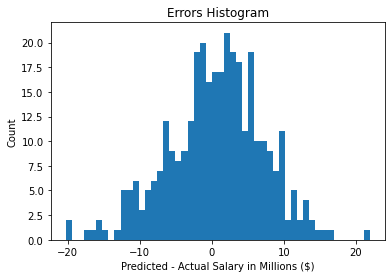

In [141]:
plt.hist(lin_reg_results['Difference'], bins=50);
plt.xlabel('Predicted - Actual Salary in Millions ($)');
plt.ylabel('Count');
plt.title('Errors Histogram');

Let's try some other techniques and see if we can do better in terms of Root Mean Squared Error and Mean Absolute Error.

**2. CART (Classification and Regression Tree)** </br>
Essentially Decision Trees that work for continuous variables! The predicted value is chosen at the lowest MSE point.

Train our model.

In [142]:
clf = DecisionTreeRegressor(max_depth = 4, criterion = 'mse') # use max_depth = 4 and criterion = 'mse'
cart = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Predict salaries.

In [143]:
y_pred_cart = cart.predict(X_test)
cart_results = target_data.copy(deep = True)
cart_results = cart_results[['Player', 'Salary']]
cart_results['Difference'] = y_pred_cart - y_test
cart_results

,Player,Salary,Difference
0,Aaron Gordon,16.409091,5.247116
1,Aaron Holiday,3.980551,-0.796998
3,Aaron Wiggins,1.000000,2.183553
5,Al Horford,27.000000,-18.510752
6,Alec Burks,9.536000,-1.046752
...,...,...,...
419,Willy Hernangómez,2.327220,6.162028
422,Zach Collins,6.984127,-3.800574
423,Zach LaVine,19.500000,6.326456
424,Zeke Nnaji,2.498760,0.684793


Visualize the decision tree.

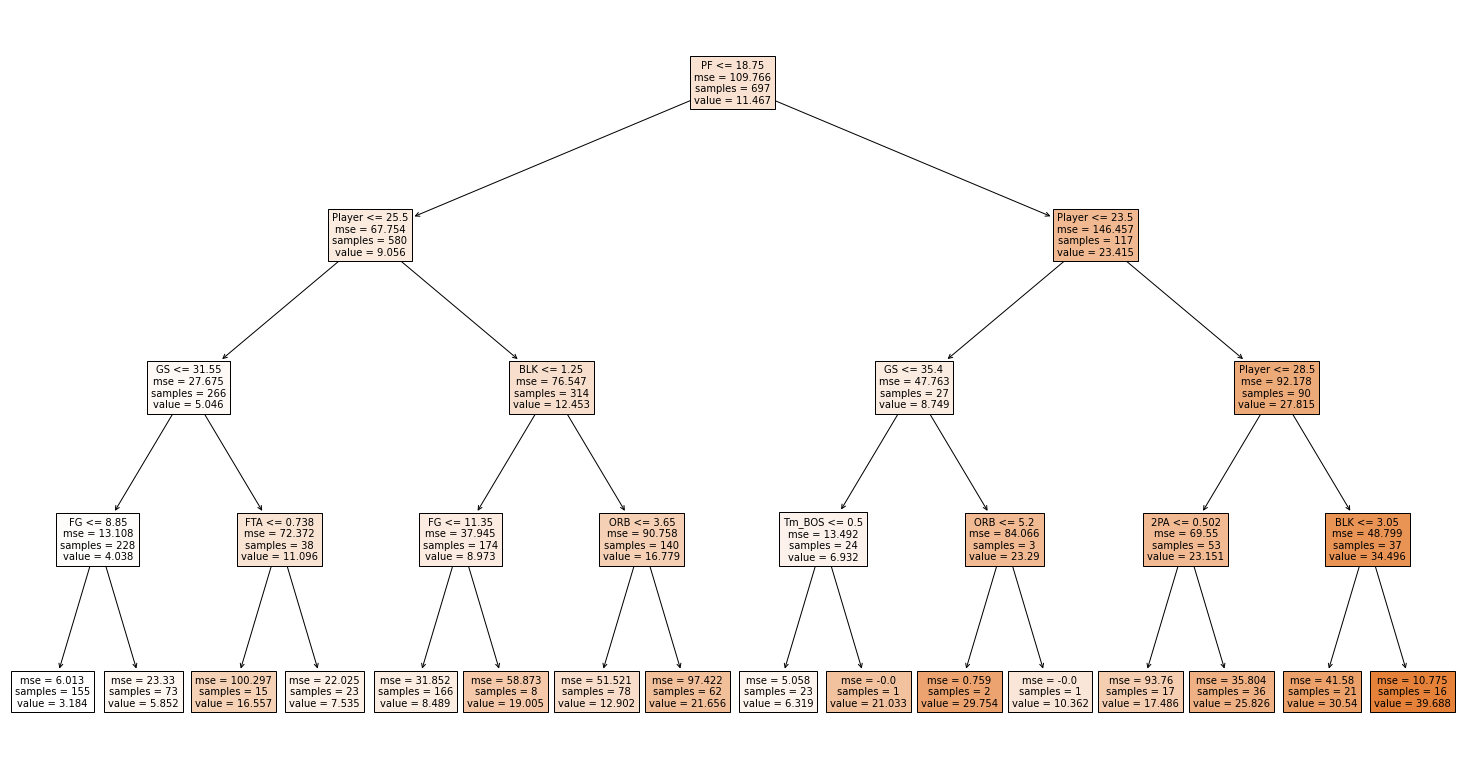

In [144]:
fig, ax = plt.subplots(figsize=(26, 14))
tree.plot_tree(clf, fontsize=10, feature_names= target_data.columns, filled = True); 

Undervalued players according to linear regression.

In [145]:
cart_results.sort_values(by='Difference', ascending=False).head(10)

,Player,Salary,Difference
82,Darius Garland,7.040880,22.712632
91,DeMarcus Cousins,0.759106,20.897101
177,Jae'Sean Tate,1.517981,20.138226
13,Andre Drummond,2.401537,19.254670
29,Bobby Portis,4.347600,17.308607
173,JaVale McGee,5.000000,16.656207
293,Mason Plumlee,8.137500,13.518707
180,Jakob Poeltl,8.750000,12.906207
268,Lance Stephenson,0.924730,11.977093
411,Victor Oladipo,2.389641,10.512182


Overvalued players according to linear regression.

In [146]:
cart_results.sort_values(by='Difference', ascending=True).head(10)

,Player,Salary,Difference
27,Blake Griffin,32.405817,-23.916569
360,Russell Westbrook,44.211146,-22.554939
69,D'Angelo Russell,30.013500,-22.478783
15,Andrew Wiggins,31.579390,-18.677567
5,Al Horford,27.000000,-18.510752
199,Jayson Tatum,28.103550,-17.741265
226,Jrue Holiday,30.133333,-17.231510
210,John Collins,23.000000,-17.147786
391,Tobias Harris,36.000000,-14.343793
358,Rudy Gobert,35.344828,-13.688621


Blake Griffin was 2nd for the linear regression model too, maybe he really is overvalued.

Let's take a look at some popular names.

In [147]:
popular = ['Stephen Curry', 'Klay Thompson', 'Russell Westbrook', 'LeBron James', 'Giannis Antetokounmpo']
for name in popular:
  display(cart_results[cart_results['Player'] == name])

,Player,Salary,Difference
373,Stephen Curry,45.780966,-6.092877


,Player,Salary,Difference
259,Klay Thompson,37.98072,-7.440789


,Player,Salary,Difference
360,Russell Westbrook,44.211146,-22.554939


,Player,Salary,Difference
272,LeBron James,41.180544,-1.492455


,Player,Salary,Difference
147,Giannis Antetokounmpo,39.34497,-13.518514


These players are all still overvalued by the model, just like our linear regression model. This could again be explained by their worth in other features that our pergame statistics dataset does not consider. For example, consider the impact of Stephen Curry's 3pt shooting ability, and how it generates more opportunities for his teammates. This is not something measurable by our simple pergame statistics dataset.

Some more role players.

In [148]:
role_players = ['Alex Caruso', 'Danny Green', 'Otto Porter Jr.', 'Derrick White', 'Spencer Dinwiddie']
for name in role_players:
  display(cart_results[cart_results['Player'] == name])

,Player,Salary,Difference
8,Alex Caruso,8.604651,4.297172


,Player,Salary,Difference
79,Danny Green,10.0,-1.510752


,Player,Salary,Difference
326,Otto Porter Jr.,2.389641,6.099607


,Player,Salary,Difference
102,Derrick White,15.178571,-2.276748


,Player,Salary,Difference
371,Spencer Dinwiddie,17.142857,-4.241034


Once again, role players seem to have more accurate predictions that are only off by 0-1.5 million or so. And also once again, Otto Porter Jr. popped off, congrats to Otto!

In [154]:
cart_model_rmse = mean_squared_error(y_test, cart.predict(X_test), squared=False) 
print("RMSE:", cart_model_rmse)
cart_model_mae = mean_absolute_error(y_test, cart.predict(X_test)) 
print("MAE:", cart_model_mae)

RMSE: 6.277897287897038
MAE: 4.466665116406828


Errors histogram.

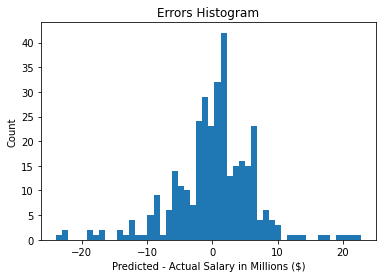

In [152]:
plt.hist(cart_results['Difference'], bins=50);
plt.xlabel('Predicted - Actual Salary in Millions ($)');
plt.ylabel('Count');
plt.title('Errors Histogram');

It seems as though the RMSE and MAE of the CART model is a bit better than the Linear Regression Model. Let's try one more technique to see if we can do better.

**ADA Boost** </br>
Adaptive Boosting, which takes the CART model we used earlier and improves it by adjusting weights of features to iteratively improve prediction on more difficult cases.

Train our model. (Depth 8 seems to provide an optimal RMSE minimization)



In [156]:
 # use max_depth = 8 and n_estimators = 500
reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8), n_estimators=500)
adaboost = reg.fit(X_train, y_train)

Predict salaries.

In [157]:
y_pred_adaboost = adaboost.predict(X_test)
adaboost_results = target_data.copy(deep = True)
adaboost_results = adaboost_results[['Player', 'Salary']]
adaboost_results['Difference'] = y_pred_adaboost - y_test
adaboost_results

,Player,Salary,Difference
0,Aaron Gordon,16.409091,-1.439792
1,Aaron Holiday,3.980551,0.025252
3,Aaron Wiggins,1.000000,2.179126
5,Al Horford,27.000000,-6.506600
6,Alec Burks,9.536000,7.024938
...,...,...,...
419,Willy Hernangómez,2.327220,10.382089
422,Zach Collins,6.984127,-1.918827
423,Zach LaVine,19.500000,1.958251
424,Zeke Nnaji,2.498760,1.330276


Undervalued players according to linear regression.

In [158]:
adaboost_results.sort_values(by='Difference', ascending=False).head(10)

,Player,Salary,Difference
91,DeMarcus Cousins,0.759106,14.922734
180,Jakob Poeltl,8.750000,14.619667
14,Andre Iguodala,2.641691,12.382205
13,Andre Drummond,2.401537,12.203655
265,LaMarcus Aldridge,2.641691,12.011090
398,Trevor Ariza,2.641691,10.391401
419,Willy Hernangómez,2.327220,10.382089
236,Keifer Sykes,0.558345,10.326053
212,Jonas Valančiūnas,14.000000,10.192015
177,Jae'Sean Tate,1.517981,10.170892


Like the linear regression model, we have quite a few NBA vets with the veteran minimum up there.

Overvalued players according to linear regression.

In [159]:
adaboost_results.sort_values(by='Difference', ascending=True).head(10)

,Player,Salary,Difference
27,Blake Griffin,32.405817,-23.300896
69,D'Angelo Russell,30.013500,-18.636848
210,John Collins,23.000000,-16.698029
15,Andrew Wiggins,31.579390,-16.395120
259,Klay Thompson,37.980720,-16.108965
250,Kevin Love,31.300000,-13.352030
141,Gary Harris,20.482143,-12.235577
147,Giannis Antetokounmpo,39.344970,-11.571822
193,Jarrett Allen,20.000000,-11.400046
360,Russell Westbrook,44.211146,-11.248210


Blake Griffin is in the top 2 for all 3 models.

Let's take a look at some popular names.

In [160]:
popular = ['Stephen Curry', 'Klay Thompson', 'Russell Westbrook', 'LeBron James', 'Giannis Antetokounmpo']
for name in popular:
  display(adaboost_results[adaboost_results['Player'] == name])

,Player,Salary,Difference
373,Stephen Curry,45.780966,-5.37968


,Player,Salary,Difference
259,Klay Thompson,37.98072,-16.108965


,Player,Salary,Difference
360,Russell Westbrook,44.211146,-11.24821


,Player,Salary,Difference
272,LeBron James,41.180544,-1.501218


,Player,Salary,Difference
147,Giannis Antetokounmpo,39.34497,-11.571822


Guess we really need more features for some of the intangibles to have better predictions for superstars!

Some more role players.

In [161]:
role_players = ['Alex Caruso', 'Danny Green', 'Otto Porter Jr.', 'Derrick White', 'Spencer Dinwiddie']
for name in role_players:
  display(adaboost_results[adaboost_results['Player'] == name])

,Player,Salary,Difference
8,Alex Caruso,8.604651,4.037137


,Player,Salary,Difference
79,Danny Green,10.0,0.852029


,Player,Salary,Difference
326,Otto Porter Jr.,2.389641,6.0899


,Player,Salary,Difference
102,Derrick White,15.178571,-1.968863


,Player,Salary,Difference
371,Spencer Dinwiddie,17.142857,-1.342479


Seems just a bit better than CART, very accurate once again except for Otto.

In [163]:
adaboost_model_rmse = mean_squared_error(y_test, y_pred_adaboost, squared=False) 
print("RMSE:", adaboost_model_rmse)
adaboost_model_mae = mean_absolute_error(y_test, y_pred_adaboost)
print("MAE:", adaboost_model_mae)

RMSE: 5.207859150736688
MAE: 3.8978455080884995


Lowest RMSE error of the 3 models we tried! But MAE is average... Is this the best?

Errors histogram.

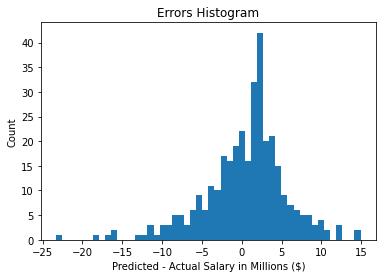

In [164]:
plt.hist(adaboost_results['Difference'], bins=50);
plt.xlabel('Predicted - Actual Salary in Millions ($)');
plt.ylabel('Count');
plt.title('Errors Histogram');

**ENDING CONSIDERATIONS**

Q: How can we improve our model by adding features? What features does our model fail to recognize that may be important in predicting salaries? </br> Think of features like player recognition (translates to ticket sales/fan attendance, jersey sales, media hype), intangibles (Steph Curry's 3pt shooting/impact on spreading the floor, Giannis's leadership, etc.), team value (salary cap space, small/big market team), and team standings (is a team tanking? meaning they have young players playing more minutes and scoring more but not necessarily worth big contracts).

Q: How can we improve our model by processing our data differently? </br>
Should we filter out by >= 15.0 MP? Or something else? Are there any features that could be filtered for? Should we have adjusted for inflation differently? Should we use more data from previous years?

Q: What other models could we try? </br>
Ideas could be Random Forests, Neural Networks, etc.